In [218]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

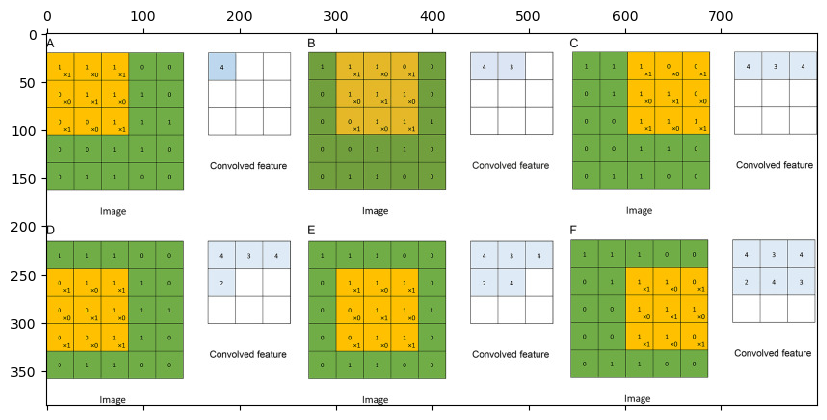

In [219]:
# A CNN is a kind of network architecture for deep learning algorithms and is specifically used for image recognition and tasks that involve the processing of pixel data.
img3 = Image.open('C://Users//user//Downloads//convolution.jpg')
plt.matshow(img3)

In [220]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #normalize

In [221]:
print(len(x_train))
print(len(x_test))

60000
10000


In [222]:
x_train.shape

(60000, 28, 28)

In [223]:
x_train.ndim

3

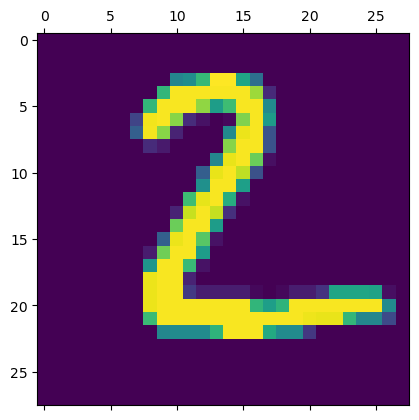

In [316]:
plt.matshow(x_test[1])

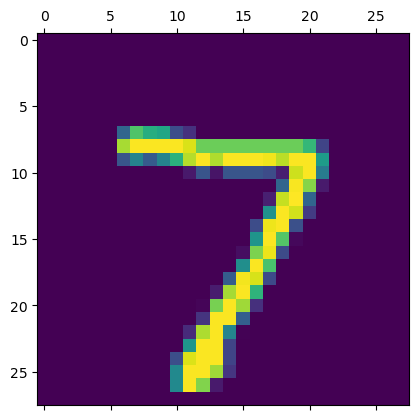

In [250]:
plt.matshow(x_test[0])

In [225]:
x_train.shape[0]

60000

In [226]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [227]:
# # Add a channel dimension (for grayscale images)
# x_train = x_train[..., tf.newaxis] # done to reshape the data
# x_test = x_test[..., tf.newaxis]
# x_train
# x_train.shape

In [228]:
# Create a CNN model
#Sequential model in Keras allows you to create neural network models by stacking layers one after another.
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), #32 because image size is 28x28
    MaxPooling2D((2, 2)), #Reduces the spatial dimensions
    Conv2D(64, (3, 3), activation='relu'), #Introduces non-linearity to the model by applying an activation function
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(), # Converts the 2D feature maps into a 1D vector, which can be fed into fully connected layers.
    Dense(64, activation='relu'), 
    Dense(10, activation='softmax') #output layer 10 because number 0-9
    #The softmax function takes a vector of raw scores (logits) and transforms them into a probability distribution
])

#So this is an 8 layered architecture

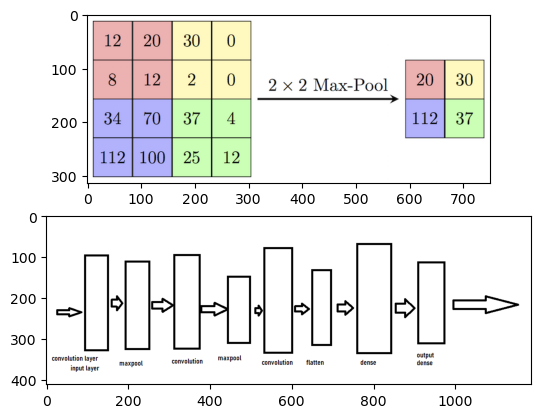

In [229]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('C://Users//user//Downloads//MaxpoolSample2.png')
plt.subplot(2,1,1)
plt.imshow(img)
img2 = Image.open('C://Users//user//Downloads//cnn.png')
plt.subplot(2,1,2)
plt.imshow(img2)

In [230]:
# Compile the model
model.compile(optimizer='adam', #combination of rmsprop with sgd with momentum
              loss='sparse_categorical_crossentropy', #when each sample belongs exactly to one class
              metrics=['accuracy'])

In [231]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1440 - accuracy: 0.9555 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0332 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0543 - val_accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0343 - val_accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0294 - val_accuracy: 0.9918


In [232]:
y_pred = model.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)
print(y_pred)
print(y_pred_labels)
# Calculate accuracy using sklearn's accuracy_score
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

313/313 [==============================] - 3s 8ms/step
[[1.2368606e-10 1.2496355e-09 2.1777979e-08 ... 9.9999988e-01
  7.2221612e-10 8.2463558e-08]
 [2.2056103e-11 1.5095175e-09 1.0000000e+00 ... 6.1842355e-13
  2.0446905e-11 4.4320425e-16]
 [2.1090571e-10 9.9999976e-01 1.5463089e-08 ... 7.8094573e-08
  7.2006108e-09 2.9718686e-08]
 ...
 [9.3206908e-19 9.7132495e-15 7.3440552e-18 ... 2.1431624e-13
  8.4972246e-12 4.5880136e-11]
 [3.0054900e-11 5.9662930e-13 8.0358244e-15 ... 1.6730441e-14
  5.5888959e-06 1.0454094e-11]
 [1.6427887e-11 2.4281391e-11 1.9960693e-10 ... 5.8502375e-17
  1.3234648e-10 6.2608692e-17]]
[7 2 1 ... 4 5 6]
Accuracy: 0.9918


In [311]:
def digit_recognizer(output):
    if output[0]==1:
        return 0
    elif output[1]==1:
        return 1
    elif output[2]==1:
        return 2
    elif output[3]==1:
        return 3
    elif output[4]==1:
        return 4
    elif output[5]==1:
        return 5
    elif output[6]==1:
        return 6
    elif output[7]==1:
        return 7
    elif output[8]==1:
        return 8
    elif output[9]==1:
        return 9        
    else:
        print("Sorry,the Digit is not recognizable")

In [322]:
output=model.predict(x_test)
output=output.round()[1]
output=output.astype('int')
output

313/313 [==============================] - 2s 6ms/step


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [323]:
digit_recognizer(output)

2